# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import torch

from collections import deque
from ddpg_agent import Agent

import matplotlib.pyplot as plt
%matplotlib inline


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
env = UnityEnvironment(file_name="D:/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [6]:
agent_0 = Agent(state_size, action_size, random_seed=123)
agent_1 = Agent(state_size, action_size, random_seed=234)

In [7]:
def ddpg(n_episodes=5000, max_t=1000):
    """DDPG.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    historical_scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    average_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations         
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        for t in range(max_t):
            action_0 = agent_0.act(states[0], add_noise=True)    
            action_1 = agent_1.act(states[1], add_noise=True)    
            env_info = env.step([action_0, action_1])[brain_name]
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                  # get the reward
            dones = env_info.local_done                  # see if episode has finished
      
            
            agent_0.step(states[0], action_0, rewards[0], next_states[0], dones[0])
            agent_1.step(states[1], action_1, rewards[1], next_states[1], dones[1])
            
            states = next_states  # roll over the state to next time step
            scores += rewards  # update the score
            #print(scores)
            if any(dones):  # exit loop if episode finished
                break 
        scores_window.append(max(scores))       # save most recent score
        #print(scores_window)
        historical_scores.append(max(scores))             

        average_scores.append(np.mean(scores_window))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent_0.actor_local.state_dict(), 'agent_0_actor_checkpoint.pth')
            torch.save(agent_0.critic_local.state_dict(), 'agent_0_critic_checkpoint.pth')
            torch.save(agent_1.actor_local.state_dict(), 'agent_1_actor_checkpoint.pth')
            torch.save(agent_1.critic_local.state_dict(), 'agent_1_critic_checkpoint.pth')
            break
    return historical_scores, average_scores

hist_scores, avg_scores = ddpg()


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.01
Episode 600	Average Score: 0.01
Episode 700	Average Score: 0.01
Episode 800	Average Score: 0.04
Episode 900	Average Score: 0.05
Episode 1000	Average Score: 0.08
Episode 1100	Average Score: 0.10
Episode 1200	Average Score: 0.12
Episode 1300	Average Score: 0.20
Episode 1400	Average Score: 0.19
Episode 1500	Average Score: 0.36
Episode 1528	Average Score: 0.50
Environment solved in 1428 episodes!	Average Score: 0.50


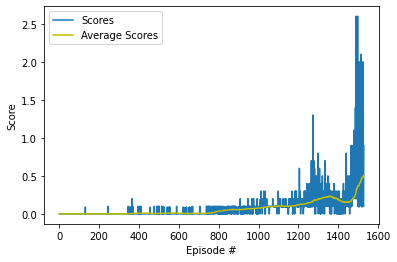

In [8]:

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(hist_scores)+1), hist_scores, label='Scores')
plt.plot(np.arange(1, len(hist_scores)+1), avg_scores, c='y', label='Average Scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()